<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_09/linear_algebra_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 📘 1장: 벡터 (Vectors)
### 🔹 개념 요약
- 벡터는 방향과 크기를 가진 수학적 객체입니다.
- 덧셈, 스칼라 곱, 내적, 크기 등을 이해하는 것이 중요합니다.

### 🔹 직관적 영상
[Essence of Linear Algebra – Chapter 1 (3Blue1Brown)](https://www.youtube.com/watch?v=fNk_zzaMoSs)
        

In [18]:

import numpy as np

# 벡터 생성
v1 = np.array([3, 4])
v2 = np.array([1, -1])

# 벡터 연산
sum_v = v1 + v2
dot_product = np.dot(v1, v2)
norm = np.linalg.norm(v1)

print("벡터 합:", sum_v)
print("내적:", dot_product)
print("크기:", norm)

벡터 합: [4 3]
내적: -1
크기: 5.0


Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


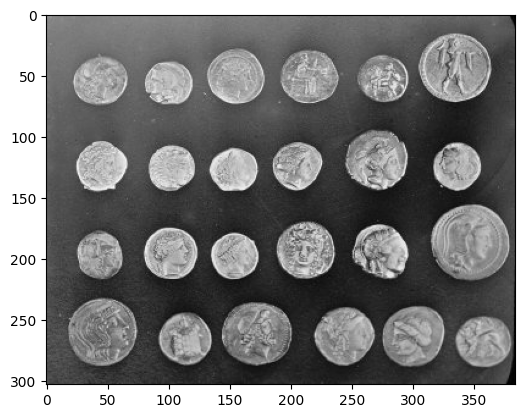

In [ ]:
from skimage import data
import matplotlib.pyplot as plt

coins = data.coins()  # 흑백 이미지 (NumPy 배열)
print('Type:', type(coins))  # <class 'numpy.ndarray'>
print('dtype:', coins.dtype) # uint8
print('shape:', coins.shape) # (303, 384)

plt.imshow(coins, cmap='gray')
plt.show()

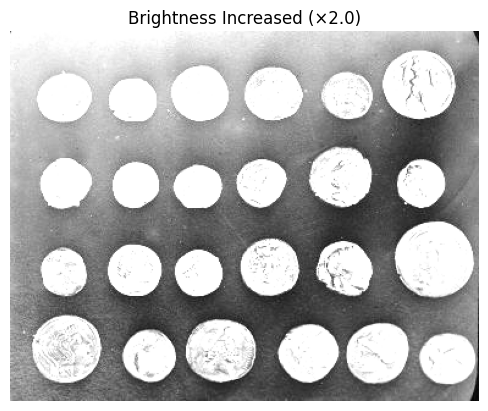

In [31]:
coins = data.coins()

# 밝기 증가 (1.5배)
brighter = coins * 2.0
brighter = np.clip(brighter, 0, 255).astype(np.uint8)  # 데이터 범위 제한 후 uint8 변환

plt.imshow(brighter, cmap='gray')
plt.title("Brightness Increased (×2.0)")
plt.axis('off')
plt.show()



## 📘 2장: 선형결합, Span, 기저(Base)

### 🔹 개념 요약
- 선형결합: 여러 벡터를 스칼라 곱해 더한 것
- Span: 선형결합으로 생성되는 공간
- 기저: 선형독립 + Span을 모두 만족하는 최소 집합

### 🔹 직관적 영상
[Linear combinations, span, linear dependence (3Blue1Brown)](https://www.youtube.com/watch?v=k7RM-ot2NWY)
        

In [5]:
v1 = np.array([1, 2])
v2 = np.array([2, 4])  # v2는 v1의 배수
span = np.column_stack((v1, v2))
span

array([[1, 2],
       [2, 4]])

In [4]:
rank = np.linalg.matrix_rank(span)

print("벡터 집합의 차원(랭크):", rank)

벡터 집합의 차원(랭크): 1


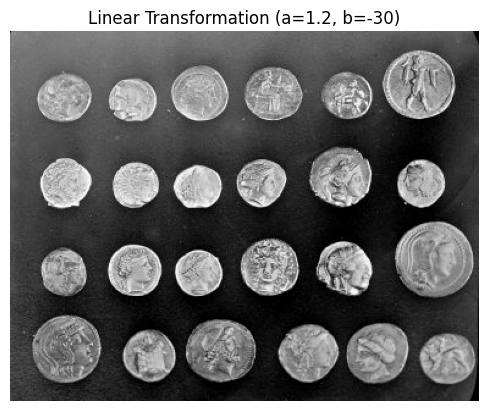

In [32]:
# 선형 변환: output = a * x + b
a = 1.2  # 대비 증가 계수
b = -30  # 전체적으로 어둡게 이동

linear_transformed = coins * a + b
linear_transformed = np.clip(linear_transformed, 0, 255).astype(np.uint8)

plt.imshow(linear_transformed, cmap='gray')
plt.title("Linear Transformation (a=1.2, b=-30)")
plt.axis('off')
plt.show()


## 📘 3장: 선형변환과 행렬(Linear Transformation & Matrix)

### 🔹 개념 요약
- 선형변환은 행렬로 표현 가능하며, 공간을 변형시킵니다.
- \(T(x) = Ax\) 형태로 계산합니다.

### 🔹 직관적 영상
[What is a matrix? – Linear Transformation Intro (3Blue1Brown)](https://www.youtube.com/watch?v=kYB8IZa5AuE)
        

In [8]:

A = np.array([[2, 0], [0, 1]])
v = np.array([1, 2])
print(A.shape)
print(v.shape)

T_v = A @ v  # 선형변환 적용
print("변환된 벡터:", T_v)


(2, 2)
(2,)
변환된 벡터: [2 2]



## 📘 4장: 행렬곱과 합성변환

### 🔹 개념 요약
- 행렬곱은 연속된 선형변환을 하나로 합성하는 역할
- 순서가 중요하며 \(AB \neq BA\)

### 🔹 직관적 영상
[Matrix multiplication as transformation composition (3Blue1Brown)](https://www.youtube.com/watch?v=XkY2DOUCWMU)
        

In [15]:

A = np.arange(15).reshape(3,5)
print(A)
print(A.shape)
B = np.arange(15).reshape(5,3)
print(B)
print(B.shape)

C = A @ B  # 합성된 행렬
print("합성 행렬 A·B:\n", C)
print(C.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
(5, 3)
합성 행렬 A·B:
 [[ 90 100 110]
 [240 275 310]
 [390 450 510]]
(3, 3)


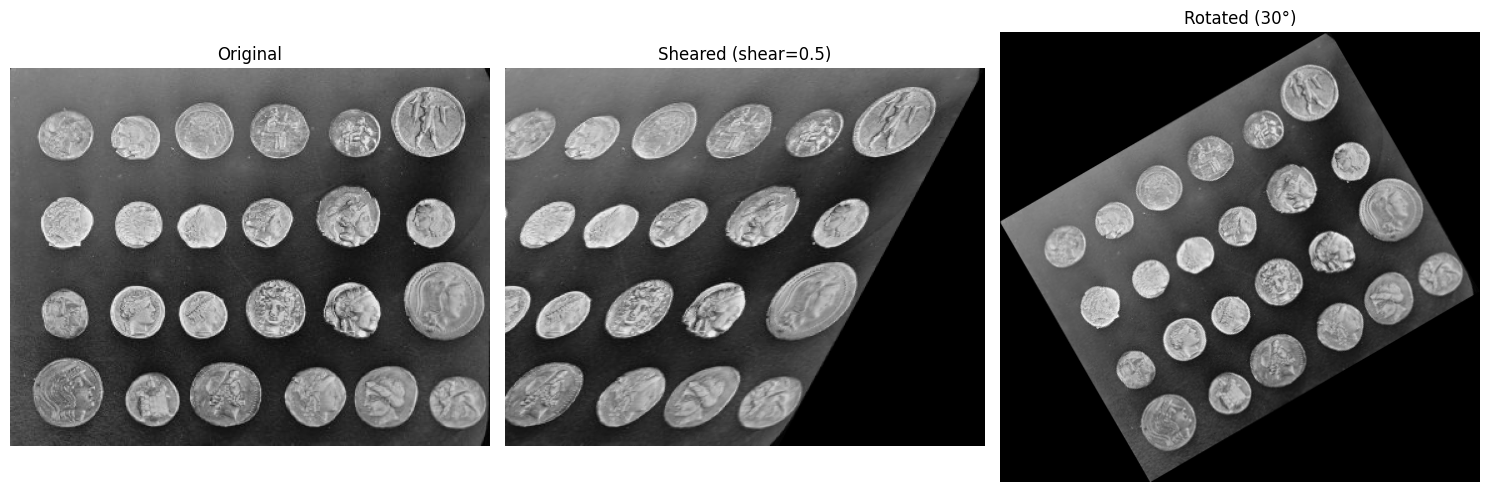

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import AffineTransform, warp, rotate

# 이미지 불러오기
coins = data.coins()

# 1. Shear 변환 (X축 기준으로 기울이기)
shear_transform = AffineTransform(shear=0.5)  # 라디안 단위
sheared_image = warp(coins, shear_transform.inverse)

# 2. Rotate 변환 (반시계 방향 회전)
rotated_image = rotate(coins, angle=30, resize=True)

# 결과 출력
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(sheared_image, cmap='gray')
axes[1].set_title("Sheared (shear=0.5)")
axes[1].axis('off')

axes[2].imshow(rotated_image, cmap='gray')
axes[2].set_title("Rotated (30°)")
axes[2].axis('off')

plt.tight_layout()
plt.show()



## 📘 9장: 내적과 쌍대성

### 🔹 개념 요약
- 내적은 두 벡터의 유사도, 각도 측정 가능
- 내적이 0이면 직교
- 쌍대성: 벡터 공간과 그에 대응하는 함수 공간의 관계

### 🔹 직관적 영상
[Dot Product Intuition – (3Blue1Brown)](https://www.youtube.com/watch?v=LyGKycYT2v0)
        

In [16]:

a = np.array([1, 2])
b = np.array([3, 4])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
print("두 벡터 사이의 코사인 값:", cos_theta)


두 벡터 사이의 코사인 값: 0.9838699100999074


In [17]:
a = np.array([1, 2])
b = np.array([100, 200])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
print("두 벡터 사이의 코사인 값:", cos_theta)

두 벡터 사이의 코사인 값: 1.0
